In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path



In [7]:
demand = dummy_data.create_dummy_site_demand(2022)
carbon = dummy_data.generate_dummy_carbon_profile(2022)
price = dummy_data.generate_dummy_price_profile(2022)

In [8]:
# standard_data_process.default_processing(demand, data_preparation.OutlierRemover, manipulations.ResampleManipulator)

In [9]:
functions.add_time_features(demand)

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number
2022-01-01 00:00:00+00:00,10,0,5,1,1,2022,weekend,0,2022-01-01,52,WINTER,1
2022-01-01 00:30:00+00:00,1,0,5,1,1,2022,weekend,1,2022-01-01,52,WINTER,1
2022-01-01 01:00:00+00:00,0,1,5,1,1,2022,weekend,2,2022-01-01,52,WINTER,1
2022-01-01 01:30:00+00:00,4,1,5,1,1,2022,weekend,3,2022-01-01,52,WINTER,1
2022-01-01 02:00:00+00:00,3,2,5,1,1,2022,weekend,4,2022-01-01,52,WINTER,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00+00:00,7,21,5,365,12,2022,weekend,43,2022-12-31,52,WINTER,1
2022-12-31 22:00:00+00:00,10,22,5,365,12,2022,weekend,44,2022-12-31,52,WINTER,1
2022-12-31 22:30:00+00:00,2,22,5,365,12,2022,weekend,45,2022-12-31,52,WINTER,1
2022-12-31 23:00:00+00:00,5,23,5,365,12,2022,weekend,46,2022-12-31,52,WINTER,1


In [10]:
demand

,Site energy [kWh]
2022-01-01 00:00:00+00:00,10
2022-01-01 00:30:00+00:00,1
2022-01-01 01:00:00+00:00,0
2022-01-01 01:30:00+00:00,4
2022-01-01 02:00:00+00:00,3
...,...
2022-12-31 21:30:00+00:00,7
2022-12-31 22:00:00+00:00,10
2022-12-31 22:30:00+00:00,2
2022-12-31 23:00:00+00:00,5


In [11]:
df = functions.add_time_features(demand)

In [12]:
df = manipulations.create_seasonal_average_week(enums.Season.SUMMER, df)

In [13]:
import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")
df = manipulations.EquationManipulator().data_formatter(df, 'Site energy [kWh]', '* 2', 'Site power [kW]')

fig = px.bar(df, y=["Site energy [kWh]"], title='Site demand for a week', color=df.index)
fig.show()


In [14]:
data = {'A': [10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000],
        'B': [50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000],
        'C': [100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300]}

df = pd.DataFrame(data)

# Add outliers
df.loc[3, 'A'] = 500
df.loc[6, 'B'] = 3000
df.loc[9, 'C'] = 5000

demand_array = np.array(df)

In [15]:
dp.check_dataset(demand)

{'outliers': False, 'nan values': False, 'timeseries': True}

In [16]:
df.head(10)

,A,B,C
0,10,50,100
1,15,55,150
2,12,52,120
3,500,54,140
4,20,60,200
5,8,48,80
6,11,3000,110
7,13,53,130
8,16,56,160
9,5,45,5000


In [22]:
test = sdp.RunVisualisationPreperator(demand, dp.check_dataset, dp.OutlierRemover(), dp.FillMissingData(), dp.GenerateDatetime())

In [23]:
test._data.tail()

,Site energy [kWh]
2022-12-31 21:30:00+00:00,7
2022-12-31 22:00:00+00:00,10
2022-12-31 22:30:00+00:00,2
2022-12-31 23:00:00+00:00,5
2022-12-31 23:30:00+00:00,8


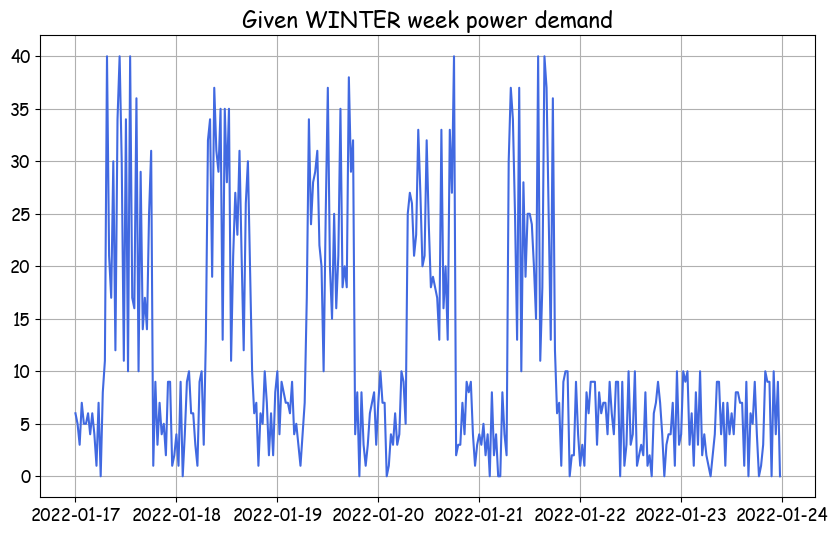

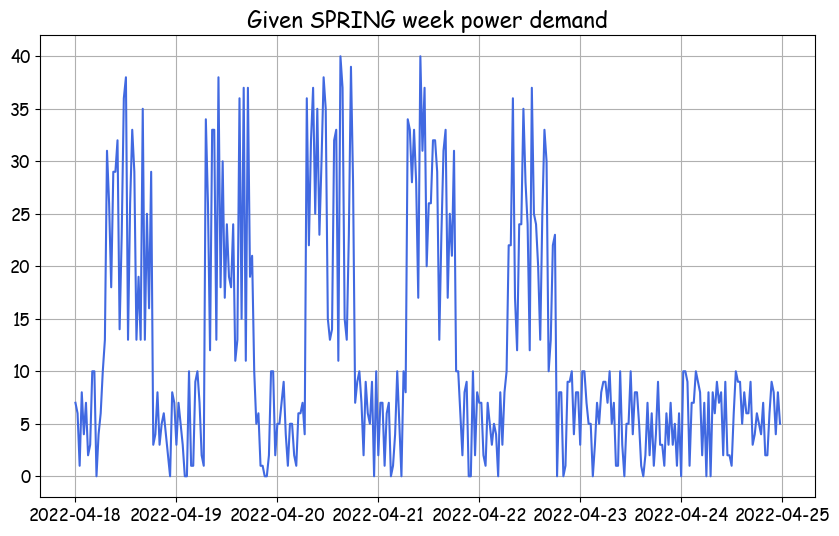

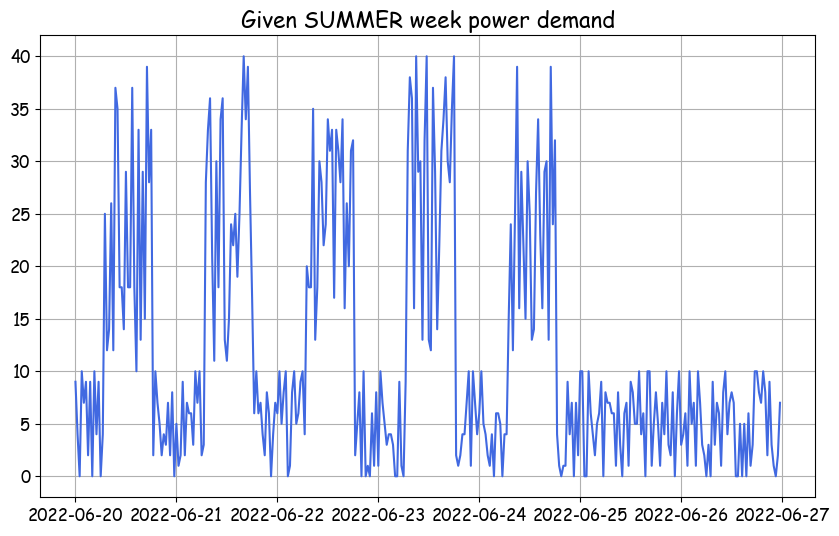

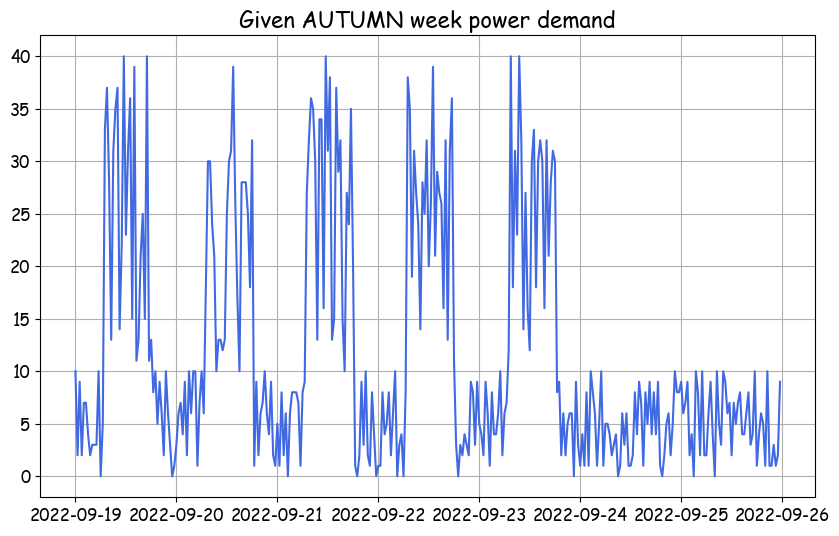

# Data preperation
### Describe

In [36]:
dp.describe_data(demand)

,Site energy [kWh]
count,17520.000000
mean,11.781336
std,11.161567
min,0.000000
25%,4.000000
50%,8.000000
75%,18.000000
max,40.000000


### Outlier remover

In [37]:
# print(df)
outlier_remover = dp.OutlierRemover()
outliers_removed_df = outlier_remover.data_cleaner(df)

print("\nDataFrame with outliers removed:")
outliers_removed_df.head()


DataFrame with outliers removed:


,A,B,C
0,10.0,50.0,100.0
1,15.0,55.0,150.0
2,12.0,52.0,120.0
3,NaN,54.0,140.0
4,20.0,60.0,200.0


### Missing data filler

In [38]:
fillMissing = dp.FillMissingData()
filled_na_df = fillMissing.data_cleaner(outliers_removed_df, func='meanfill')
filled_na_df.head()

,A,B,C
0,10.000000,50.0,100.0
1,15.000000,55.0,150.0
2,12.000000,52.0,120.0
3,12.333333,54.0,140.0
4,20.000000,60.0,200.0


### Generate datetime column/index

In [39]:
addDatetime = dp.GenerateDatetime().data_cleaner(filled_na_df, start_date=datetime(2022,1,1), freq='W')
addDatetime.head()

,A,B,C
2022-01-02 00:00:00+00:00,10.000000,50.0,100.0
2022-01-09 00:00:00+00:00,15.000000,55.0,150.0
2022-01-16 00:00:00+00:00,12.000000,52.0,120.0
2022-01-23 00:00:00+00:00,12.333333,54.0,140.0
2022-01-30 00:00:00+00:00,20.000000,60.0,200.0


# Manipulators

### Resampler

In [40]:
resampled_data = manipulations.ResampleManipulator().data_formatter(addDatetime, 'M', 'sum')
resampled_data.head()

,A,B,C
2022-01-31 00:00:00+00:00,69.333333,271.0,710.000000
2022-02-28 00:00:00+00:00,48.000000,209.4,480.000000
2022-03-31 00:00:00+00:00,42.333333,202.4,500.666667
2022-04-30 00:00:00+00:00,54.000000,214.0,540.000000
2022-05-31 00:00:00+00:00,57.333333,257.4,575.333333


### Add time features

This one doesn't need to be a protocol move back to function.

In [41]:
added_time_features = manipulations.AddTimeFeatureManipulator().data_formatter(addDatetime)
added_time_features.head()

,A,B,C,Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number
2022-01-02 00:00:00+00:00,10.000000,50.0,100.0,0,6,2,1,2022,weekend,0,2022-01-02,52,WINTER,1
2022-01-09 00:00:00+00:00,15.000000,55.0,150.0,0,6,9,1,2022,weekend,0,2022-01-09,1,WINTER,1
2022-01-16 00:00:00+00:00,12.000000,52.0,120.0,0,6,16,1,2022,weekend,0,2022-01-16,2,WINTER,1
2022-01-23 00:00:00+00:00,12.333333,54.0,140.0,0,6,23,1,2022,weekend,0,2022-01-23,3,WINTER,1
2022-01-30 00:00:00+00:00,20.000000,60.0,200.0,0,6,30,1,2022,weekend,0,2022-01-30,4,WINTER,1


### Groupby

Np.array version not working properly

In [42]:
demand_with_features = manipulations.AddTimeFeatureManipulator().data_formatter(demand)

In [43]:
manipulations.GroupbyManipulator().data_formatter(demand_with_features, groupby=['Weekday flag'], agg='mean', target='Site energy [kWh]')
# manipulations.GroupbyManipulator(added_time_features).data_formatter(groupby=7, agg='mean', target=1)

,Site energy [kWh]
Weekday flag,
weekday,14.529968
weekend,4.975198


### Apply equation

In [44]:
equationed_df = manipulations.EquationManipulator().data_formatter(added_time_features, 'A', '* 8', 'A*8')
equationed_df.head()

,A,B,C,Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number,A*8
2022-01-02 00:00:00+00:00,10.000000,50.0,100.0,0,6,2,1,2022,weekend,0,2022-01-02,52,WINTER,1,80.000000
2022-01-09 00:00:00+00:00,15.000000,55.0,150.0,0,6,9,1,2022,weekend,0,2022-01-09,1,WINTER,1,120.000000
2022-01-16 00:00:00+00:00,12.000000,52.0,120.0,0,6,16,1,2022,weekend,0,2022-01-16,2,WINTER,1,96.000000
2022-01-23 00:00:00+00:00,12.333333,54.0,140.0,0,6,23,1,2022,weekend,0,2022-01-23,3,WINTER,1,98.666667
2022-01-30 00:00:00+00:00,20.000000,60.0,200.0,0,6,30,1,2022,weekend,0,2022-01-30,4,WINTER,1,160.000000


### Seasonal Week extractor

Only currently works on 30 minute interval data due to hard coding. This is because if we are trying to plot one weeks data it needs to be a complete week otherwise the plots won't look right.

In [46]:
new_test_arr_to_df = manipulations.SeasonalWeekManipulator().data_formatter(demand, 0)
winter_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[0].index)]
spring_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[1].index)]
summer_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[2].index)]
autumn_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[3].index)]

# Plotting
### Annual plot

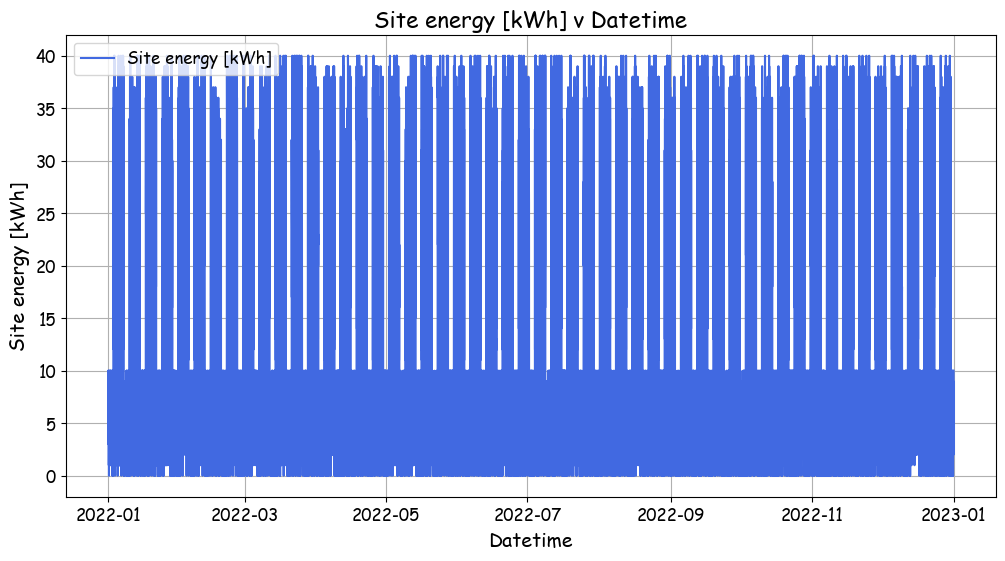

In [47]:
visualize.Visualizer(demand, timeseries=True, viz_type=viz_types.StandardPlot()).plot_plt()

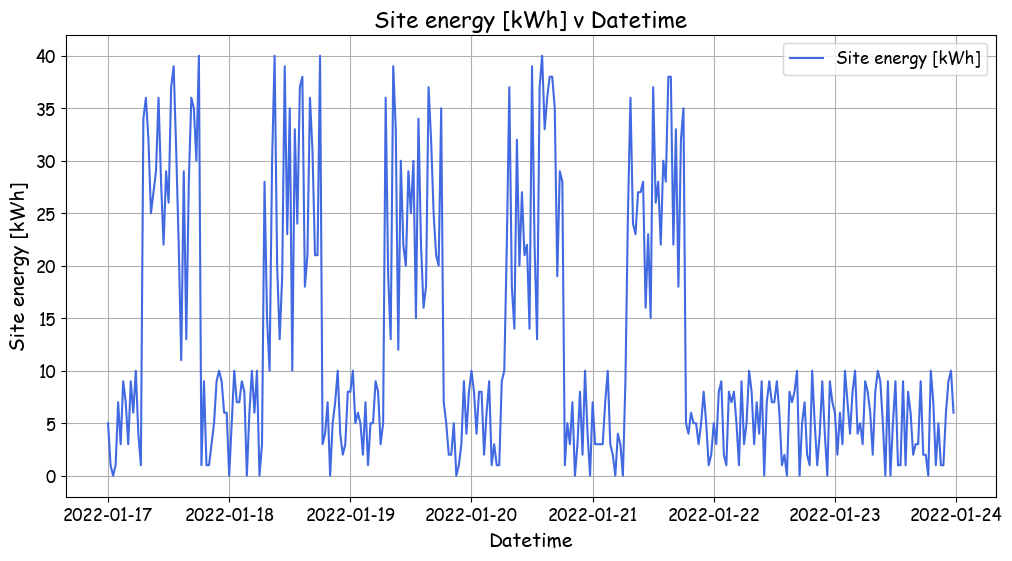

In [48]:
visualize.Visualizer(winter_week_demand, timeseries=True, viz_type=viz_types.StandardPlot()).plot_plt()

### Power Energy

In [50]:
winter_week_demand_p_e = manipulations.EquationManipulator().data_formatter(winter_week_demand, 'Site energy [kWh]', '* 2', 'Site power [kW]')

In [51]:
winter_week_arr = np.array(winter_week_demand_p_e)

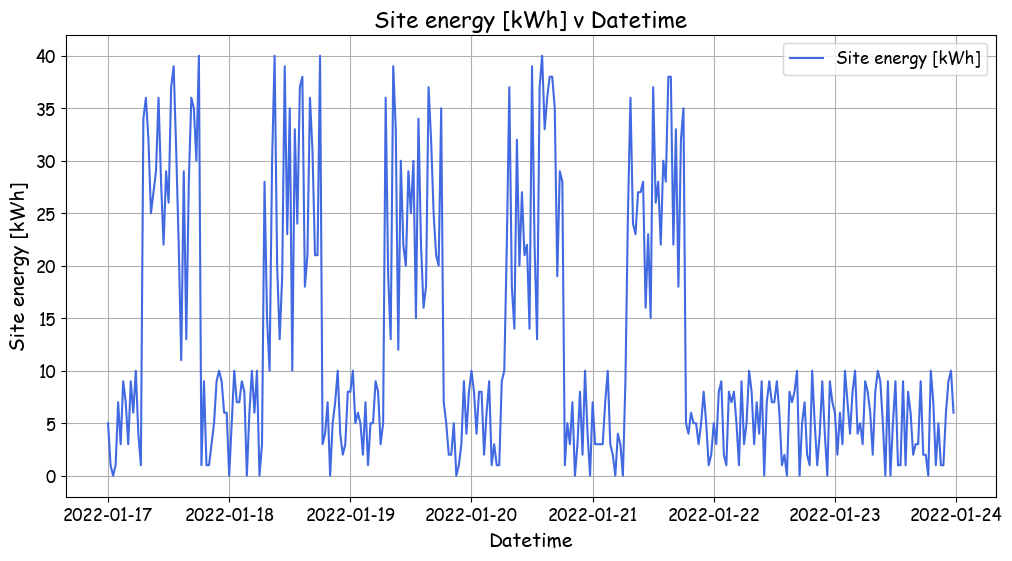

In [52]:
visualize.Visualizer(winter_week_demand_p_e, timeseries=True, multiple_y=True, viz_type=viz_types.StandardPlot()).plot_plt()

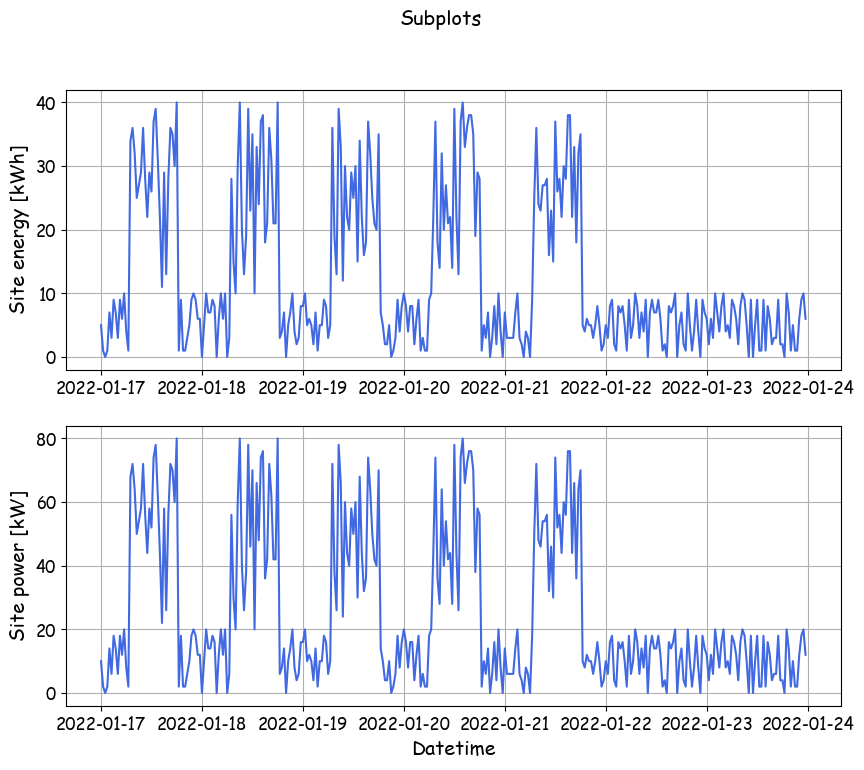

In [53]:
visualize.Visualizer(winter_week_demand_p_e, timeseries=True, viz_type=viz_types.SubplotPlot()).plot_plt()

In [54]:
save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

new_test_arr_to_df = manipulations.SeasonalWeekManipulator().data_formatter(bender_submeters, 0)
bender_winter_week_demand = bender_submeters.loc[bender_submeters.index.isin(new_test_arr_to_df[0].index)]

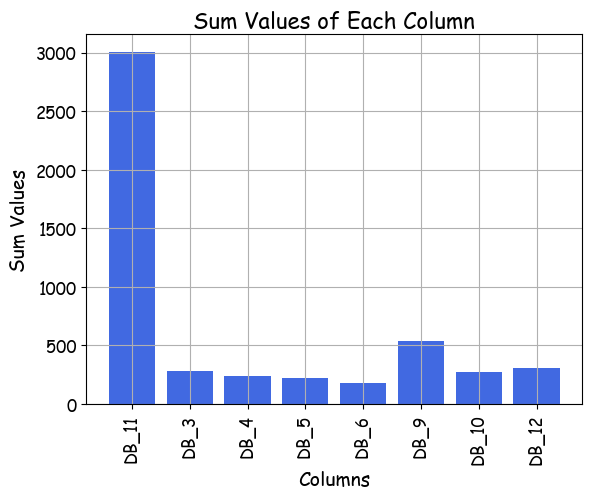

In [55]:
visualize.Visualizer(bender_winter_week_demand, timeseries=True, viz_type=viz_types.BarPlot()).plot_plt()

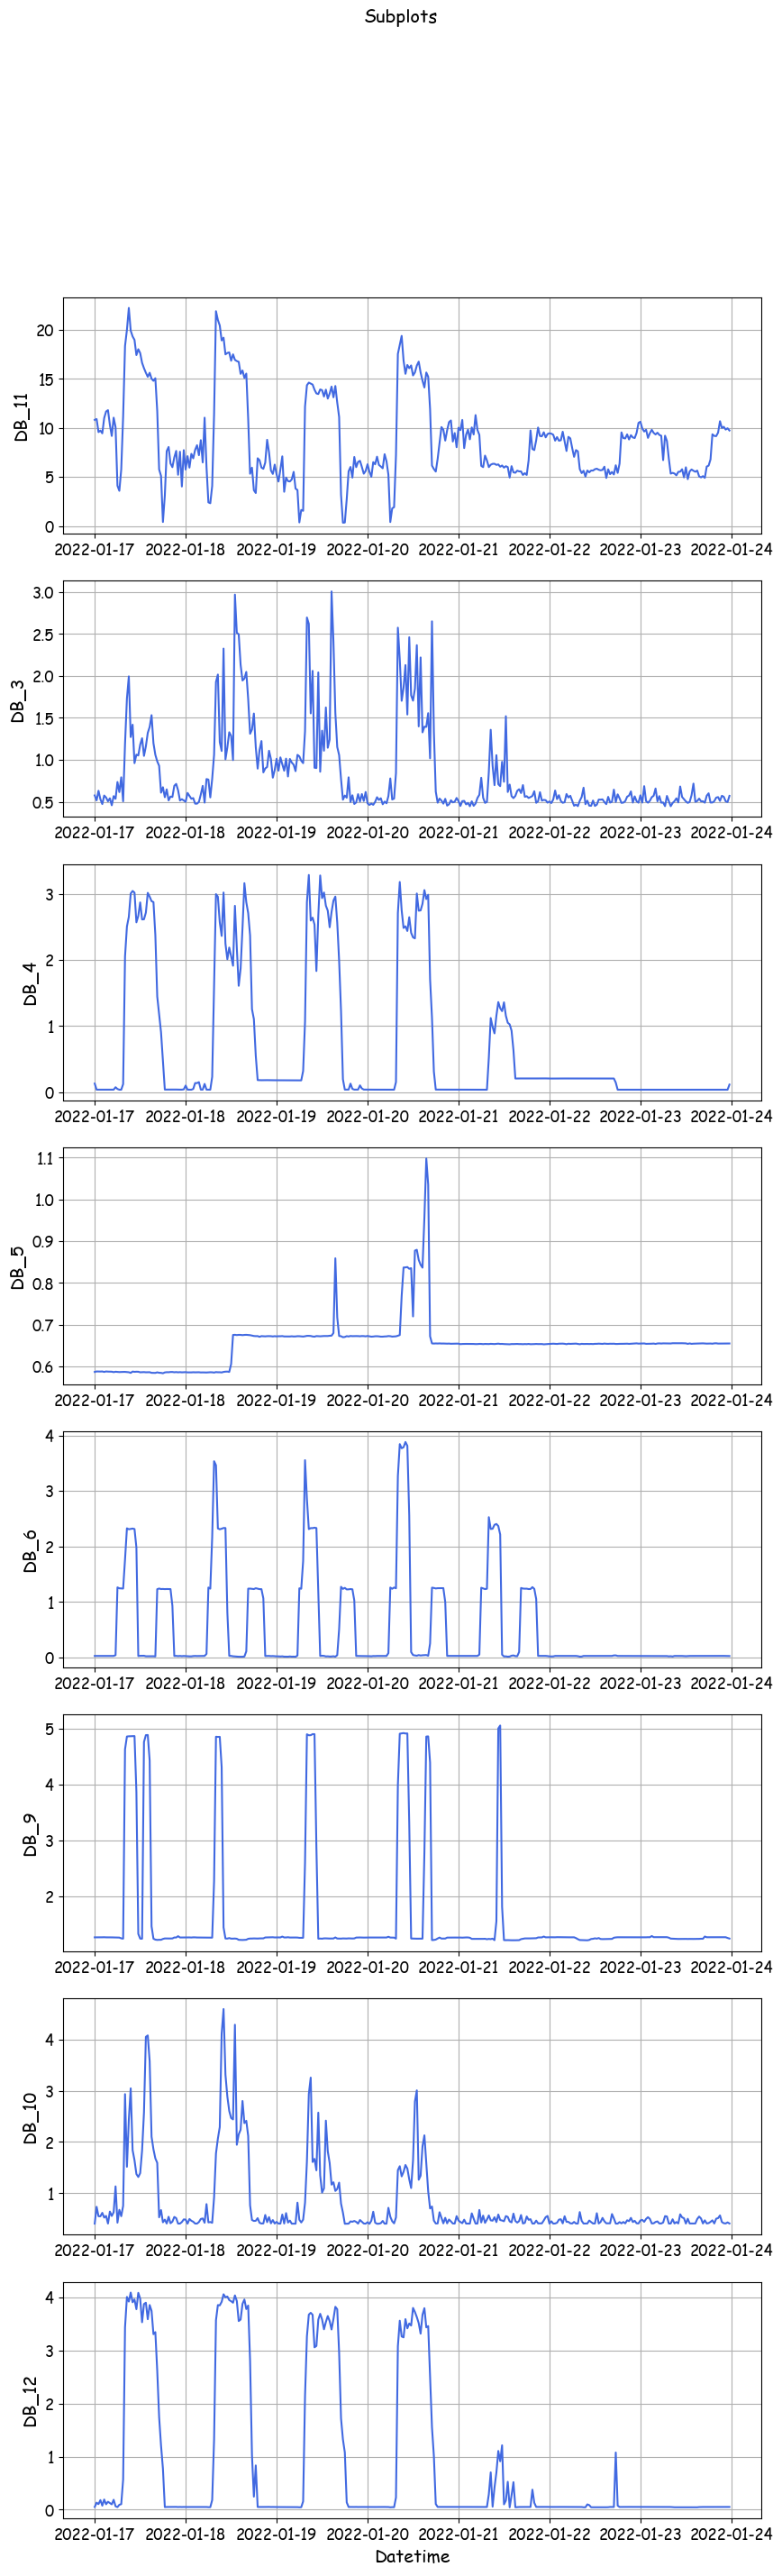

In [56]:
visualize.Visualizer(bender_winter_week_demand, timeseries=True, viz_type=viz_types.SubplotPlot()).plot_plt()

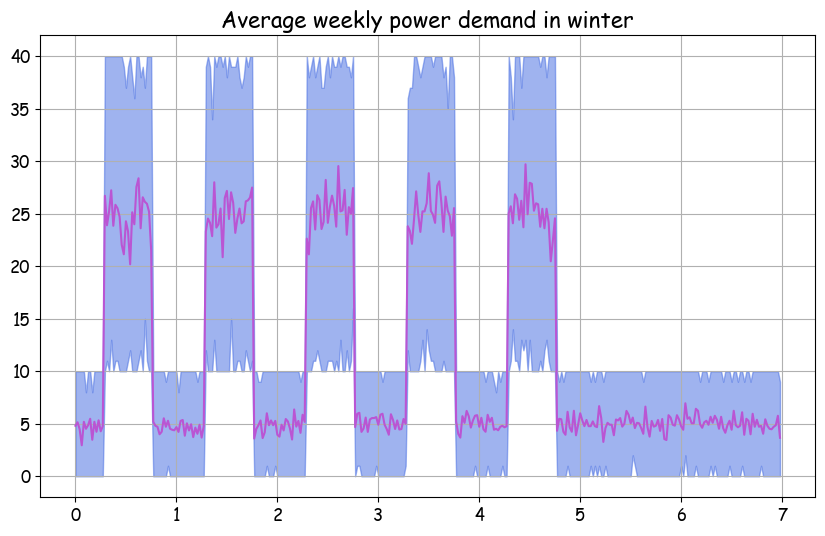

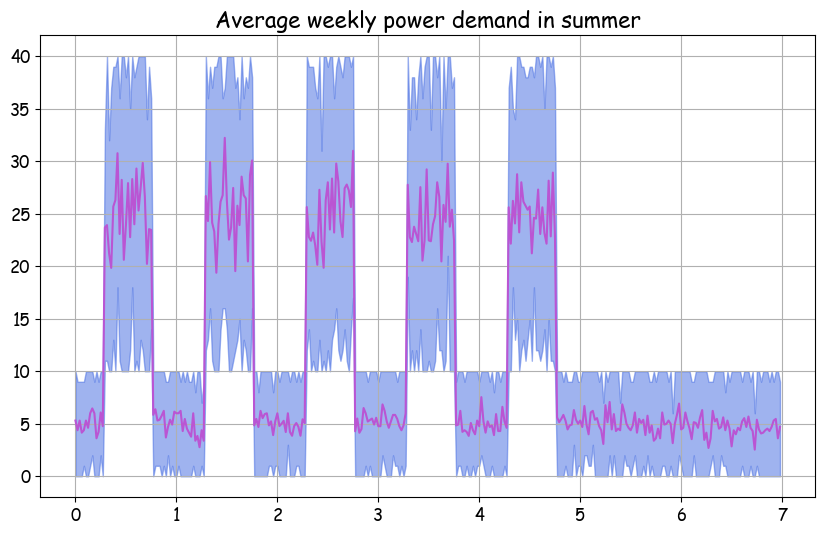

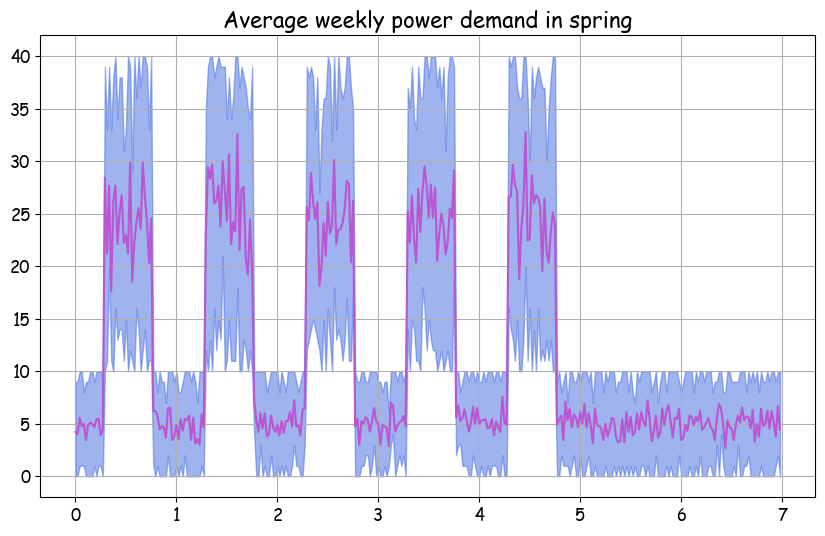

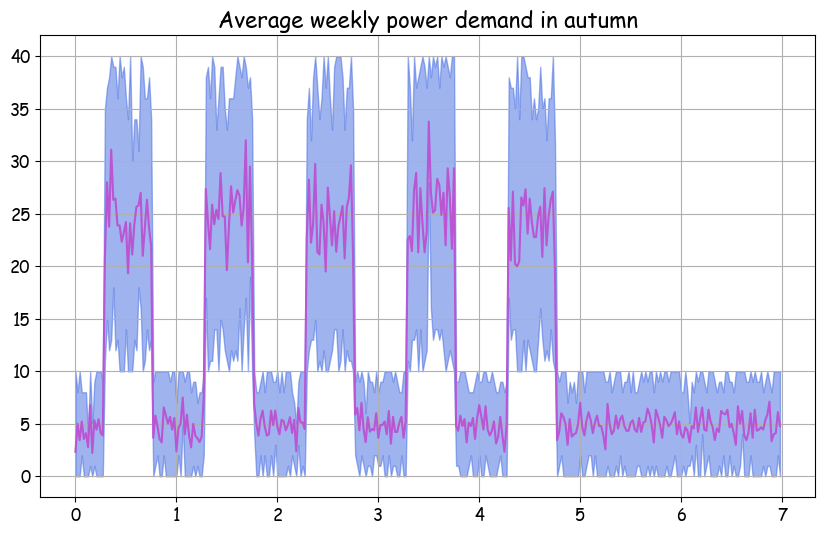

In [57]:
visualize.Visualizer(demand, viz_type=viz_types.AvgSeasonWeekPlot()).plot_plt() 

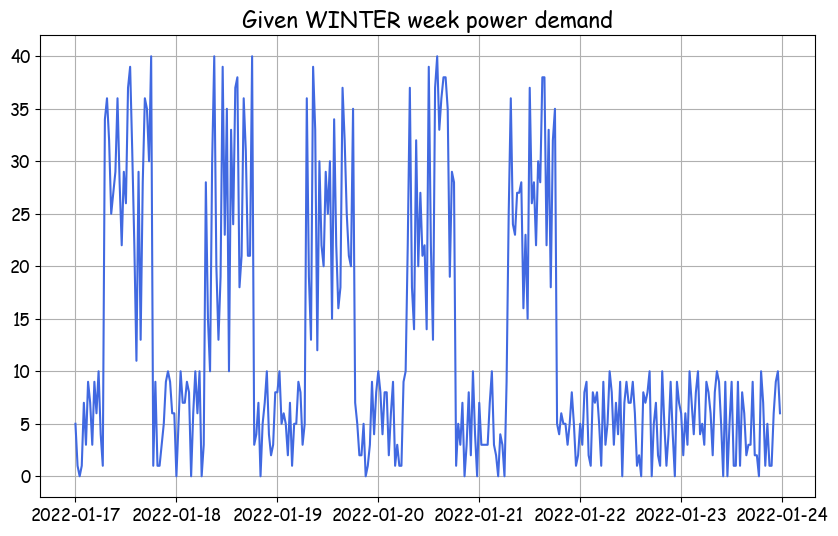

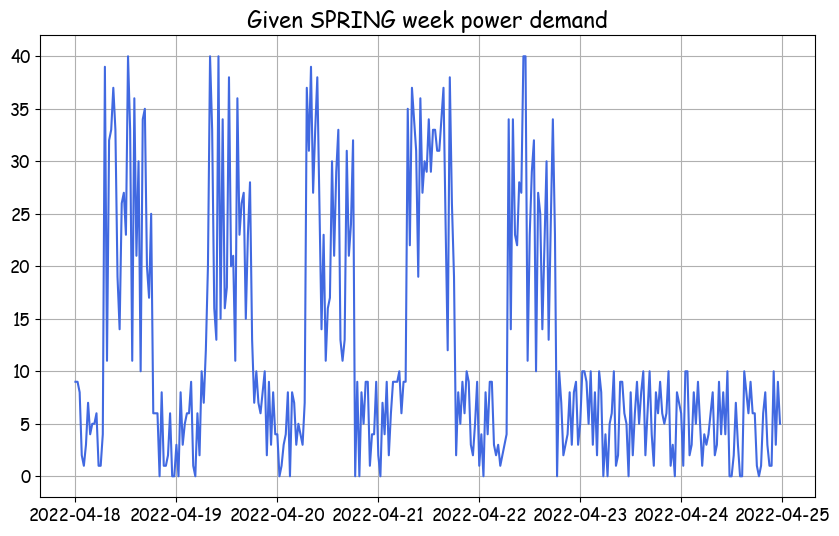

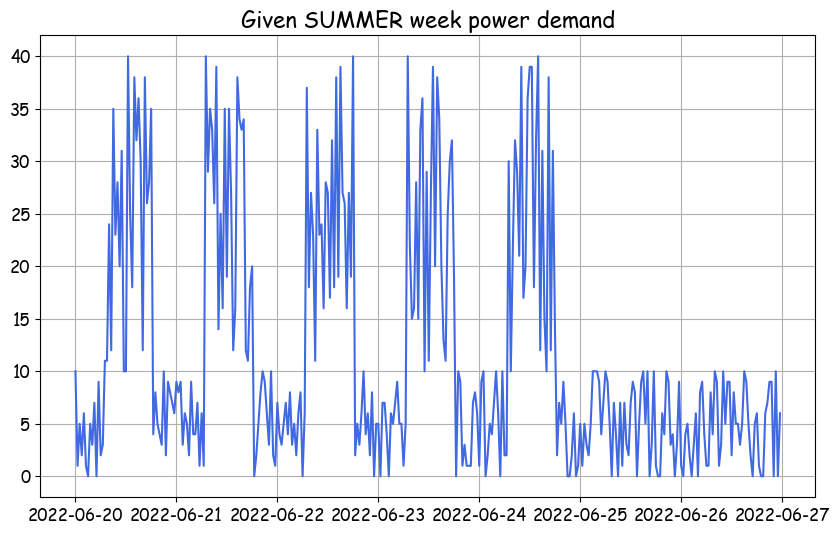

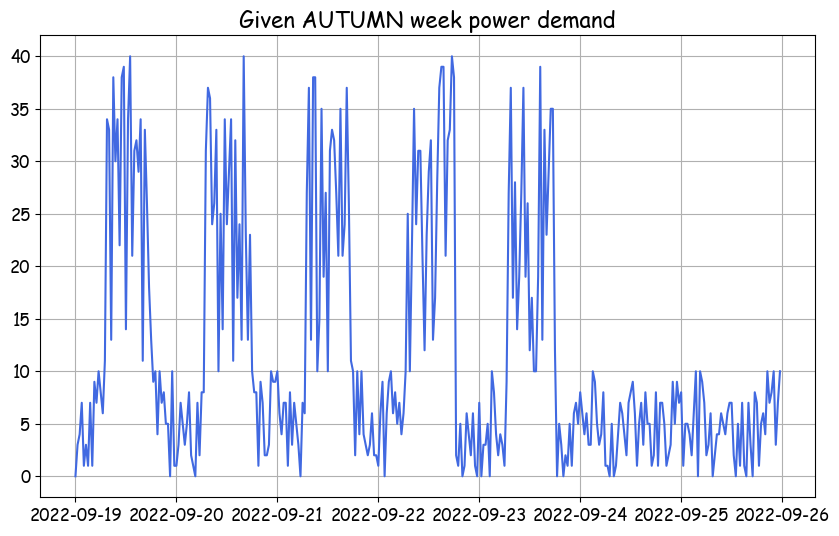

In [67]:
visualize.Visualizer(demand, viz_types.ActualSeasonWeekPlot()).plot_plt()